In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from time import time
%matplotlib inline
plt.style.use('default')

Blood Preassure data

In [2]:
x = [22, 41, 52, 23, 41, 54, 24, 46, 56, 27, 47, 57, 28, 48, 58,  9,
     49, 59, 30, 49, 63, 32, 50, 67, 33, 51, 71, 35, 51, 77, 40, 51, 81]
y = [131, 139, 128, 128, 171, 105, 116, 137, 145, 106, 111, 141, 114,
     115, 153, 123, 133, 157, 117, 128, 155, 122, 183,
     176,  99, 130, 172, 121, 133, 178, 147, 144, 217]
x = np.array(x, np.float32)
y = np.array(y, np.float32)

In [3]:
def loss(a, b):
    y_hat = a*x +b
    return tf.reduce_mean((y_hat - y)**2)

Aquí se muestra como tensorflow usa "eager execution". Es decir asigna valores a los nodos de la grafica que representa la funcion tan pronto como puede.

In [4]:
a = tf.Variable(0.0)
b = tf.Variable(139.0)
loss(a,b)

<tf.Tensor: shape=(), dtype=float32, numpy=673.4545>

In [5]:
a = tf.Variable(0.0)
b = tf.Variable(139.0)
with tf.GradientTape() as tape:
    loss_val = loss(a,b)
    print("Loss at ", loss_val)
grad_a, grad_b = tape.gradient(loss_val, [a, b])
print(grad_a, grad_b)

Loss at  tf.Tensor(673.4545, shape=(), dtype=float32)
tf.Tensor(-553.09094, shape=(), dtype=float32) tf.Tensor(0.7272725, shape=(), dtype=float32)


In [6]:
a = tf.Variable(0.0)
b = tf.Variable(139.0)
eta = 0.0004
start = time()
for i in range(8000):
    with tf.GradientTape() as tape:
        y_hat = a*x + b
        loss = tf.reduce_mean((y_hat - y)**2)
    grad_a, grad_b = tape.gradient(loss, [a, b])
    a = tf.Variable(a - eta * grad_a)
    b = tf.Variable(b - eta * grad_b)
    if (i % 400 == 0):
        t = time() - start
        print("Epoch:",i, "slope=",a.numpy(), " intercept=",b.numpy(), "gradient_a",grad_a.numpy(), "gradient_b", grad_b.numpy(), "mse=", loss.numpy(), "time for 1000 epochs ", t/5.)
        start = time()

Epoch: 0 slope= 0.22123638  intercept= 138.99971 gradient_a -553.09094 gradient_b 0.7272725 mse= 673.4545 time for 1000 epochs  0.003331708908081055
Epoch: 400 slope= 0.15008102  intercept= 137.20808 gradient_a -0.21151733 gradient_b 10.988262 mse= 621.487 time for 1000 epochs  0.5565548896789551
Epoch: 800 slope= 0.18337736  intercept= 135.48087 gradient_a -0.20394897 gradient_b 10.605133 mse= 602.83014 time for 1000 epochs  0.6041924476623535
Epoch: 1200 slope= 0.21551366  intercept= 133.81383 gradient_a -0.19665527 gradient_b 10.2353525 mse= 585.4511 time for 1000 epochs  0.5808682441711426
Epoch: 1600 slope= 0.246528  intercept= 132.20499 gradient_a -0.19015503 gradient_b 9.878472 mse= 569.26385 time for 1000 epochs  0.5469253063201904
Epoch: 2000 slope= 0.27646142  intercept= 130.65222 gradient_a -0.18405151 gradient_b 9.534027 mse= 554.18536 time for 1000 epochs  0.5177561283111572
Epoch: 2400 slope= 0.30535126  intercept= 129.15358 gradient_a -0.17642212 gradient_b 9.20162 mse= 

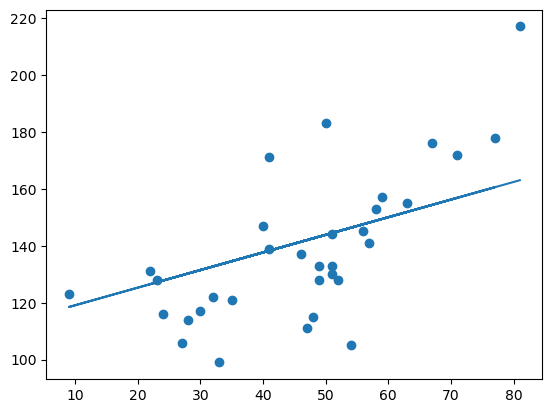

In [7]:
plt.plot(x,a*x+b)
plt.scatter(x,y)

Para mejorar el tiempo de cómputo, se puede usar "Lazy Evaluation" que es lo contrario de "Eager Evaluation". Es decir, no asigna valores en la Grafica que representa la función y por lo tanto la "misma gráfica" se puede usar en cada evaluación particular. Esto, elimina el costo computacional de crear una nueva gráfica cada vez que se evalúa la funcion.

Para esta "configuración" simplemente es neceario usar el decorador @tf.function.

In [10]:
start= time()
a  = tf.Variable(0.0)
b = tf.Variable(139.0)
eta = 0.0004

@tf.function #Will tell tf to build a graph from this code
def train_step():
    y_hat = a*x + b
    loss = tf.reduce_mean((y_hat - y)**2)
    grad_a, grad_b  = tape.gradient(loss, [a,b])
    a.assign(a - eta * grad_a)
    b.assign(b - eta * grad_b)

for i in range(8000):
  with tf.GradientTape() as tape: #Record the gradients from now on
    train_step()
    if (i % 4000 == 0):
        t = time() - start
        print("Epoch:",i, "slope=",a.numpy(),"intercept=",b.numpy(),"gradient_a", "mse=", loss.numpy(), "time for 1000 epochs ", t/5.)
        start = time()

Epoch: 0 slope= 0.22123638 intercept= 138.99971 gradient_a mse= 419.89865 time for 1000 epochs  0.03369297981262207
Epoch: 4000 slope= 0.41118363 intercept= 123.66363 gradient_a mse= 419.89865 time for 1000 epochs  0.8833683967590332


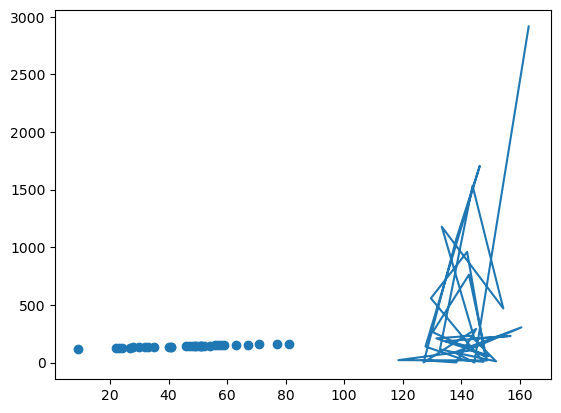

In [13]:
plt.plot(y_hat, (y_hat - y)**2)
plt.scatter(x,y_hat)